# Data Science Project
# Project Team ID : PTID-CDS-DEC-23-1718
# Client: Sales Effectiveness
# Category: Product Sales
# Project Ref: PM-PR-0019

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Data
- From {Database details: 
-  DB Name: project_sales 
-  Table Name: data 
-  Host: 18.136.157.135 
-  Port: 3306 
-  Username: dm_team2
-  Password: DM!$Team&27@9!20!},we have collected data from mysql(mysql workbench).

In [2]:
df=pd.read_csv("sales_effectiveness11.csv")
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Domain Analysis

FicZon aims to leverage machine learning to pre-categorize high-quality. ML algorithms can analyze historical high-potential 
data, identify patterns, and make predictions on high-potential more efficiently than manual methods. By automating this 
process, FicZon expects to improve the accuracy and speed of high categorization, ultimately leading to enhanced 
sales effectiveness.

# Data Preprocessing

In [3]:
#Dropping few columns which are not necessary for our data
df.drop(["Mobile"],axis=1,inplace=True)
df.drop(["EMAIL"],axis=1,inplace=True)
df.drop(["Created"],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7364 non-null   float64
 1   Source         7405 non-null   object 
 2   Sales_Agent    7399 non-null   object 
 3   Location       7364 non-null   object 
 4   Delivery_Mode  7422 non-null   object 
 5   Status         7422 non-null   object 
dtypes: float64(1), object(5)
memory usage: 348.0+ KB


In [5]:
# Dropping rows with missing data because they are few
df.replace('',np.nan,inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df.shape

(7328, 6)

In [6]:
df.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [7]:
df.Product_ID.unique()

array([ 9., 19., 18., 15., 27.,  5.,  2.,  3., 25., 10., 20., 11., 21.,
        1., 12., 13., 24., 26., 16., 23., 22.,  8., 14.,  6., 17.,  0.,
       28.,  7.,  4.])

In [8]:
df.Product_ID.value_counts()

18.0    1706
15.0    1501
19.0    1188
9.0      990
27.0     737
5.0      484
10.0     168
1.0      104
20.0     101
25.0      90
21.0      65
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
6.0        7
8.0        6
17.0       6
13.0       4
16.0       3
24.0       2
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [9]:
df.Source.unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [10]:
df.Source.value_counts()

Call                             2536
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
Existing Customer                  22
CRM form                           22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [11]:
df.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)

In [12]:
df.Source.replace('By Recommendation','Customer Referral',inplace=True)
df.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
df.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
df.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [13]:
df.Source.value_counts()

Live Chat            2663
Call                 2536
Website              1736
Customer Referral     212
Existing Customer     145
Campaign               36
Name: Source, dtype: int64

In [14]:
df.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [15]:
df.Status.value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [16]:
# Defining 'Status' as High Potential or Low Potential
df.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High_Potential',inplace=True)
df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low_Potential',inplace=True)

In [17]:
df.Status.value_counts()

Low_Potential     4466
High_Potential    2862
Name: Status, dtype: int64

In [18]:
df.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [19]:
df.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Non Native',inplace=True)
df.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [20]:
df.Location.value_counts()

Other Locations    2595
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Non Native          212
Pune                139
Name: Location, dtype: int64

In [21]:
df.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [22]:
df.Sales_Agent.value_counts()

Sales-Agent-4     1495
Sales-Agent-11    1414
Sales-Agent-5     1182
Sales-Agent-9      878
Sales-Agent-3      780
Sales-Agent-7      734
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10       5
Name: Sales_Agent, dtype: int64

In [23]:
pd.set_option("display.max_rows", None)

In [24]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat,Sales-Agent-3,Bangalore,Mode-1,High_Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,High_Potential
2,18.0,Website,Sales-Agent-11,Other Locations,Mode-1,High_Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Low_Potential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,High_Potential
5,18.0,Live Chat,Sales-Agent-9,Other Locations,Mode-3,Low_Potential
6,27.0,Call,Sales-Agent-11,Chennai,Mode-5,High_Potential
7,19.0,Live Chat,Sales-Agent-4,Non Native,Mode-2,High_Potential
8,19.0,Live Chat,Sales-Agent-4,Non Native,Mode-4,Low_Potential
9,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Low_Potential


# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Source"]=le.fit_transform(df.Source)
df["Sales_Agent"]=le.fit_transform(df.Sales_Agent)
df["Location"]=le.fit_transform(df.Location)
df["Delivery_Mode"]=le.fit_transform(df.Delivery_Mode)
df["Status"]=le.fit_transform(df.Status)

# Outliers

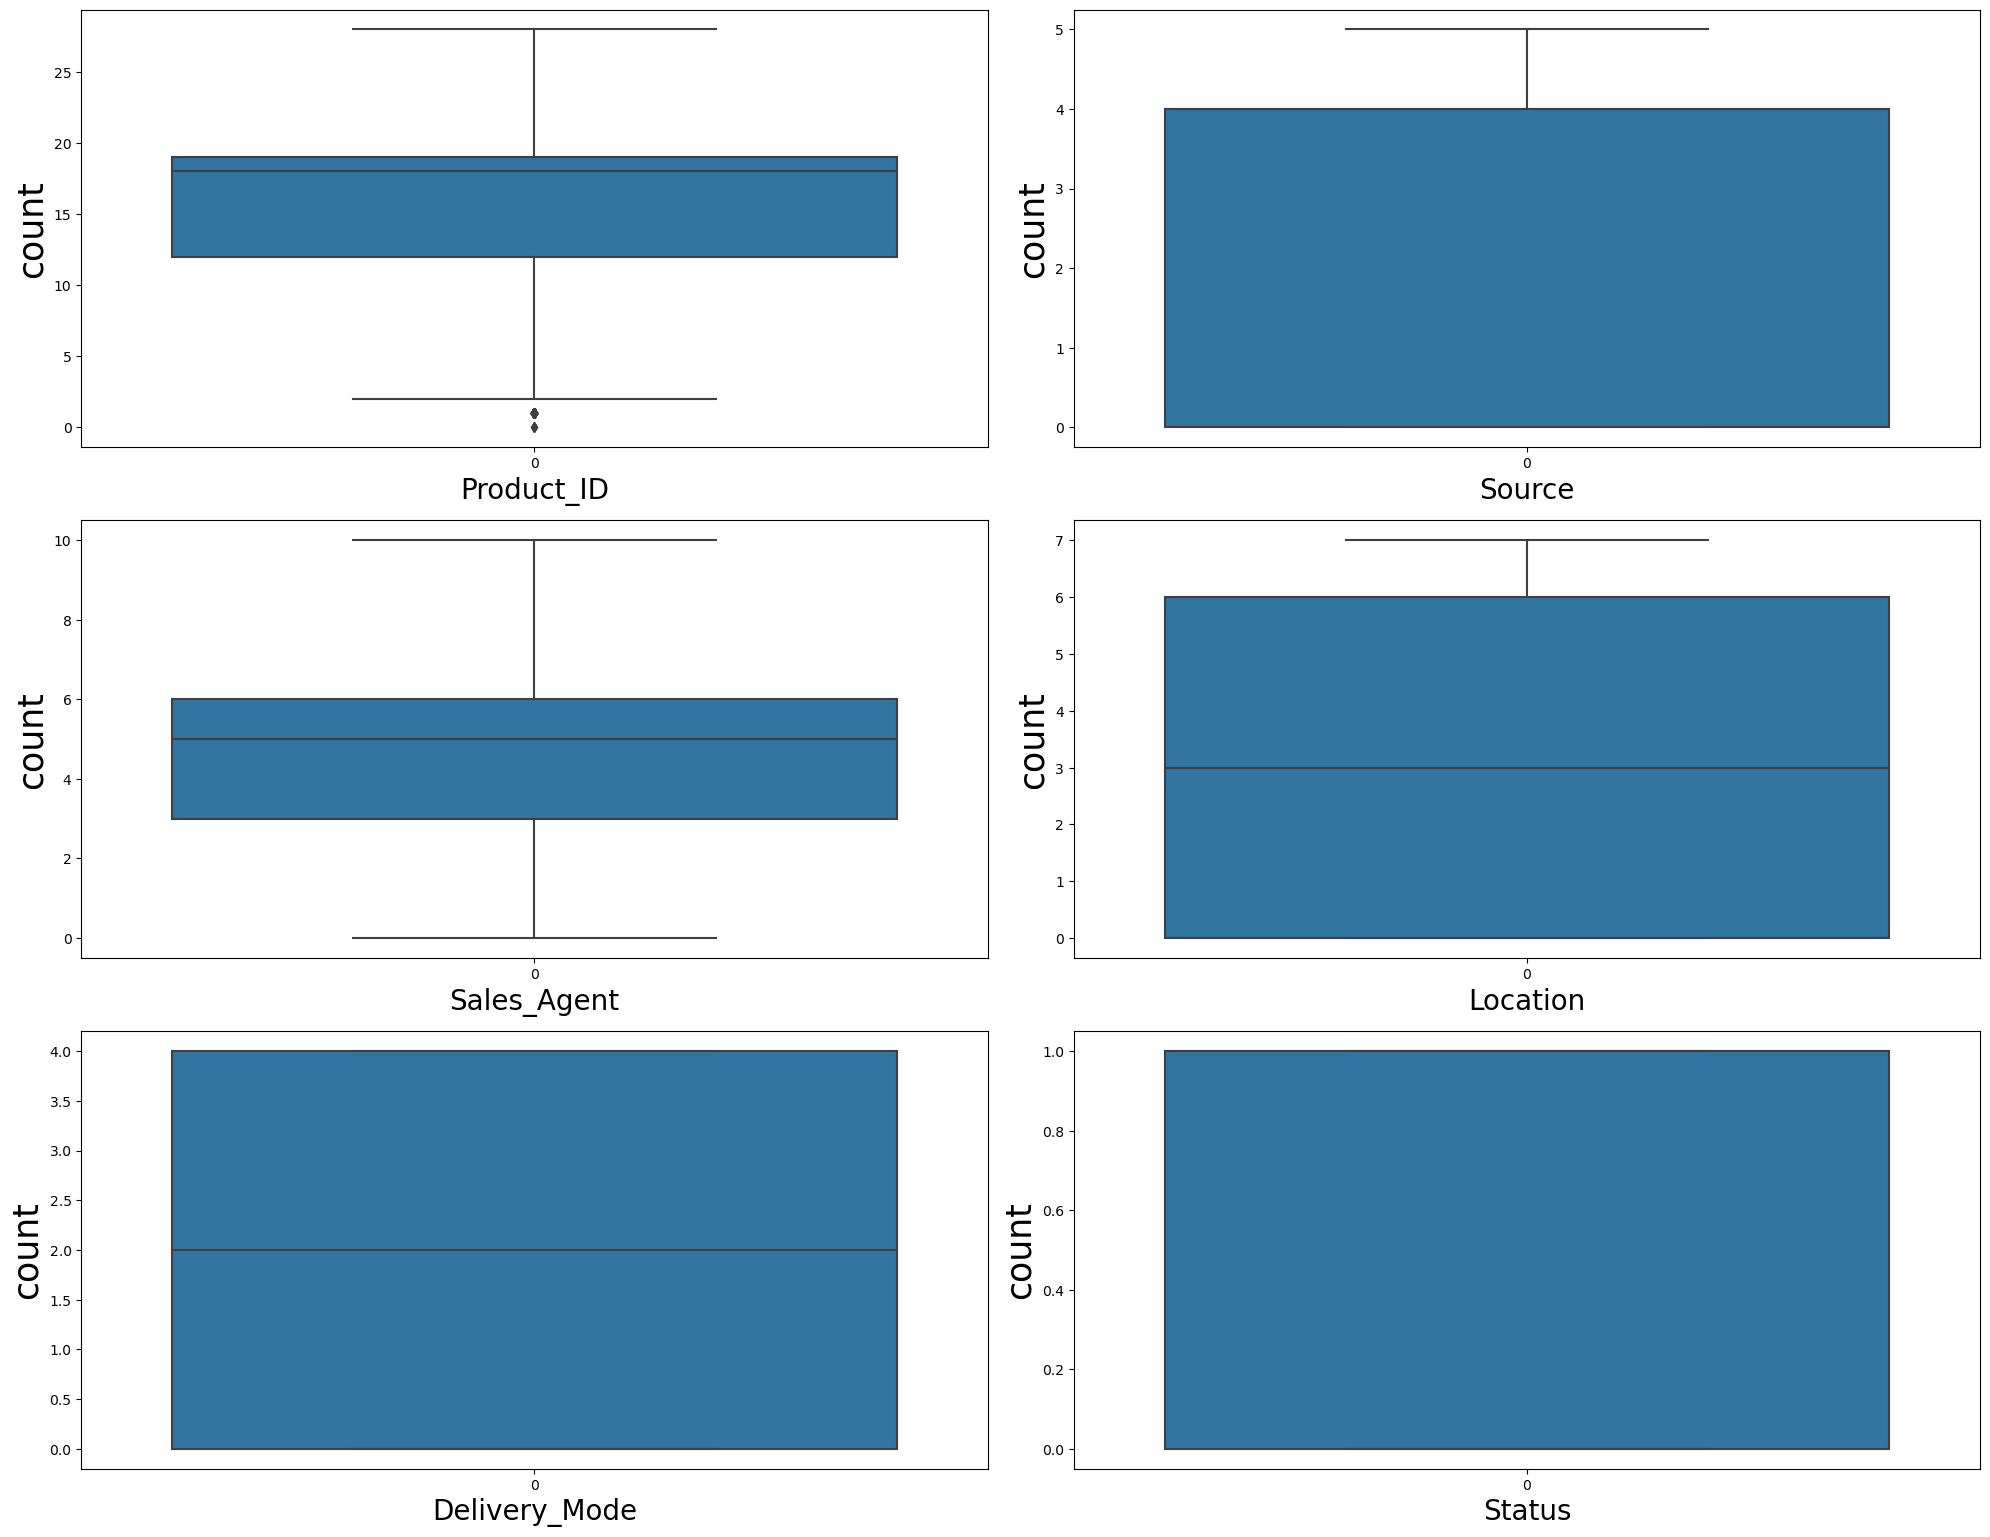

In [26]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for column in df:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=25)
    plotnumber+=1
plt.tight_layout()    

## Outlier For Product_id

In [27]:
df["Product_ID"].skew()

-0.2034749942614112

<Axes: xlabel='Product_ID', ylabel='Density'>

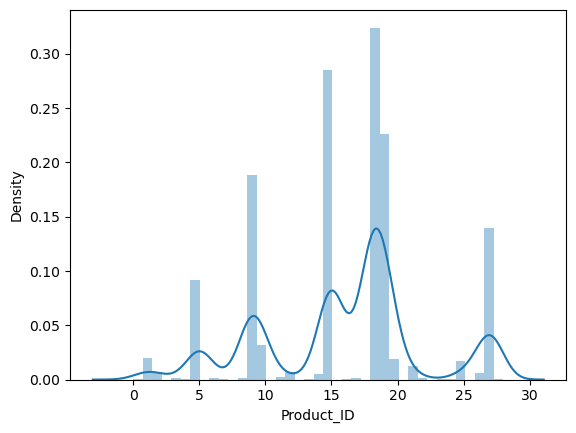

In [28]:
sns.distplot(df["Product_ID"])

In [29]:
upperlimit=df["Product_ID"].quantile(0.95)
lowerlimit=df["Product_ID"].quantile(0.05)

In [30]:
df["Product_ID"]=np.where(df["Product_ID"]>=upperlimit,upperlimit,
                                          np.where(df["Product_ID"]<lowerlimit,lowerlimit,
                                                  df["Product_ID"]))

<Axes: >

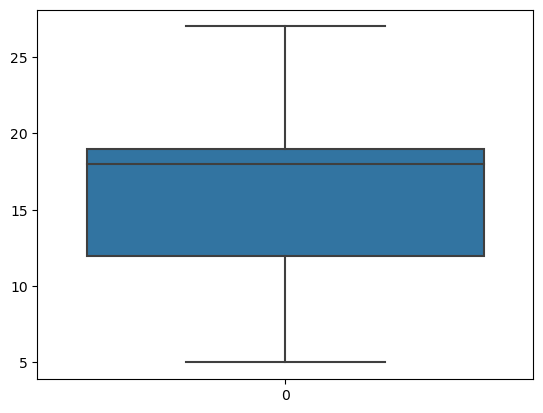

In [31]:
sns.boxplot(df["Product_ID"])

# Feature Selection

<Axes: >

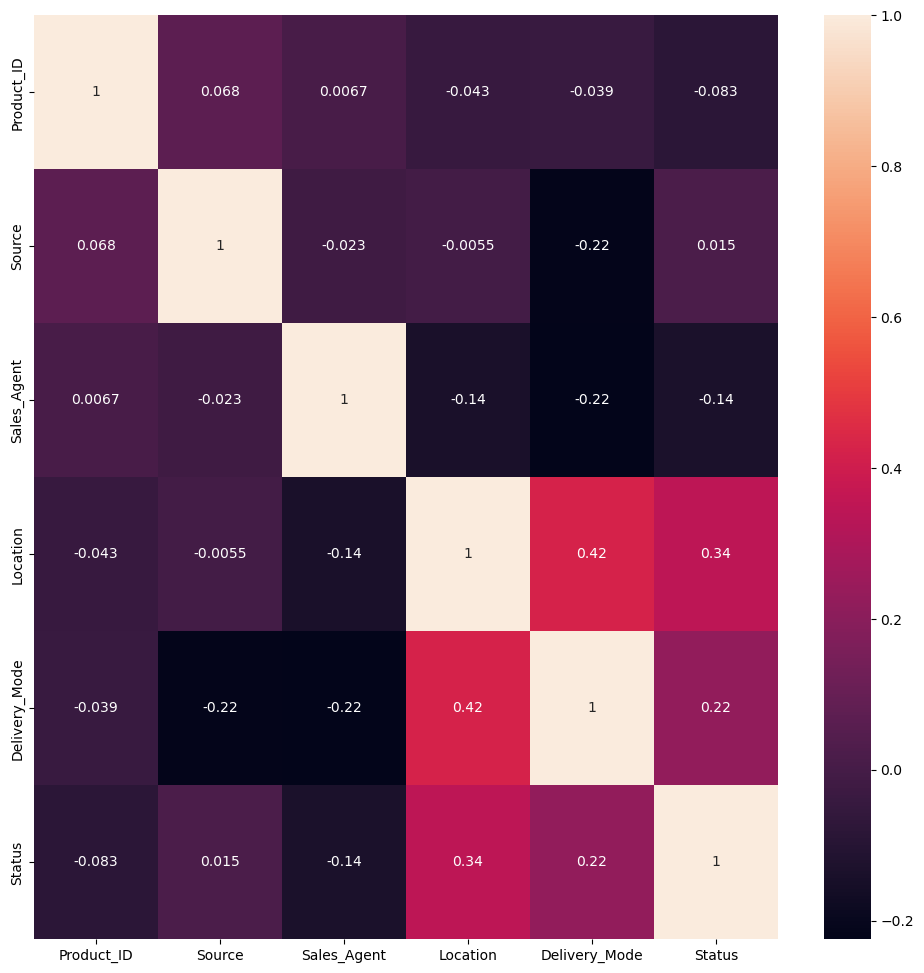

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

# Exploratory Data Analysis

In [33]:
pip install ydata-profiling

  Obtaining dependency information for wordcloud>=1.9.1 from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for pydantic-core==2.3.0 from https://files.pythonhosted.org/packages/9b/51/687ee9bc759b39c7954d4183ce145ecff652ef07b18e81e15741b9247751/pydantic_core-2.3.0-cp311-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 302.7 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.7 MB 30

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic-settings 2.1.0 requires pydantic>=2.3.0, but you have pydantic 2.0.3 which is incompatible.


In [34]:
from ydata_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###### - For overview we used profilereport,by profilereport we can know the basic details of every columns

# Univariate

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7328 non-null   float64
 1   Source         7328 non-null   int32  
 2   Sales_Agent    7328 non-null   int32  
 3   Location       7328 non-null   int32  
 4   Delivery_Mode  7328 non-null   int32  
 5   Status         7328 non-null   int32  
dtypes: float64(1), int32(5)
memory usage: 200.5 KB


## Analysis Of Numerical Data

<Axes: xlabel='Product_ID', ylabel='Density'>

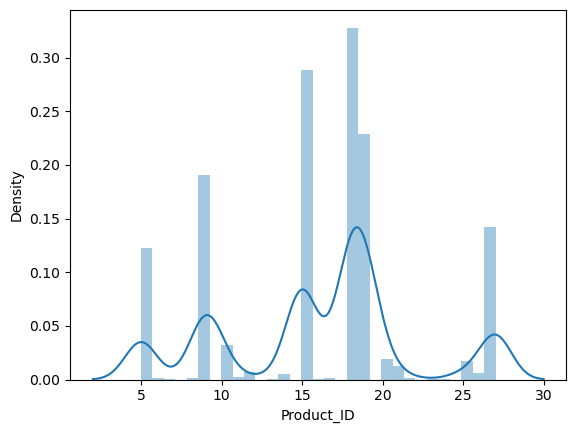

In [36]:
sns.distplot(df["Product_ID"])

### Insights
- Product_Id is distributed normally with very few outliers,we found around 15-20 product_ID's are little more.

## Analysis Of Categorical Data

<Axes: >

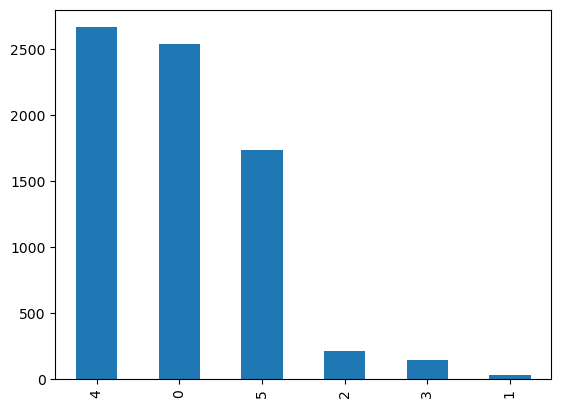

In [37]:
df["Source"].value_counts().plot(kind="bar")

### Insights
- We have more than 2500 pdf(probability density function) for live chat,live chat is having high.
- Campaign's are very low than compared to all.

<Axes: >

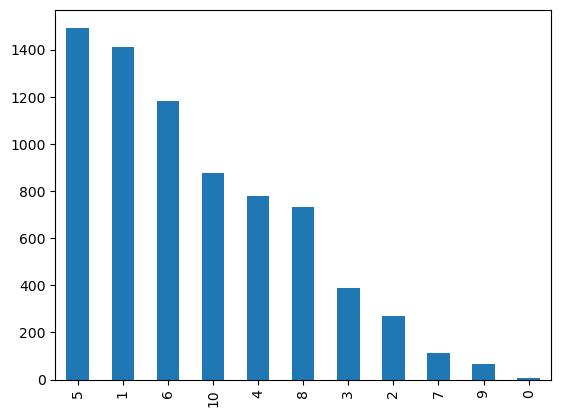

In [38]:
df["Sales_Agent"].value_counts().plot(kind="bar")

### Insights
- Sales agent-4 performance is good with 1400 probability  when we compare with other agents.
- The sales agent-10 lies at the least.

<Axes: ylabel='Location'>

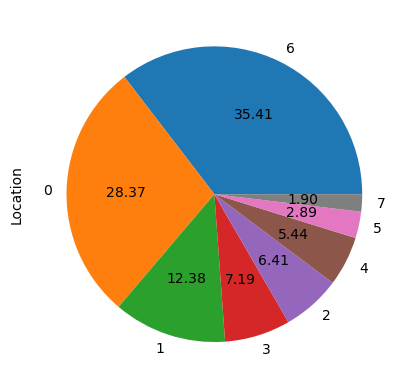

In [39]:
df["Location"].value_counts().plot(kind="pie",autopct="%.2f")

### Insights
- We found other locations are high of 35.41%,and the second highest is 28.37.
- The lowest location we found is pune with just 1.90%.

1    4466
0    2862
Name: Status, dtype: int64

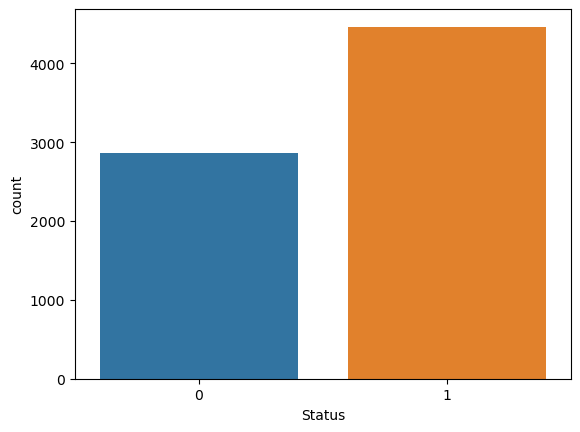

In [40]:
sns.countplot(x = "Status", data = df)
df.loc[:, 'Status'].value_counts()

### Insights
- we can see that low_potential is high than compared to high_potential.

# Bivariate

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7328 non-null   float64
 1   Source         7328 non-null   int32  
 2   Sales_Agent    7328 non-null   int32  
 3   Location       7328 non-null   int32  
 4   Delivery_Mode  7328 non-null   int32  
 5   Status         7328 non-null   int32  
dtypes: float64(1), int32(5)
memory usage: 200.5 KB


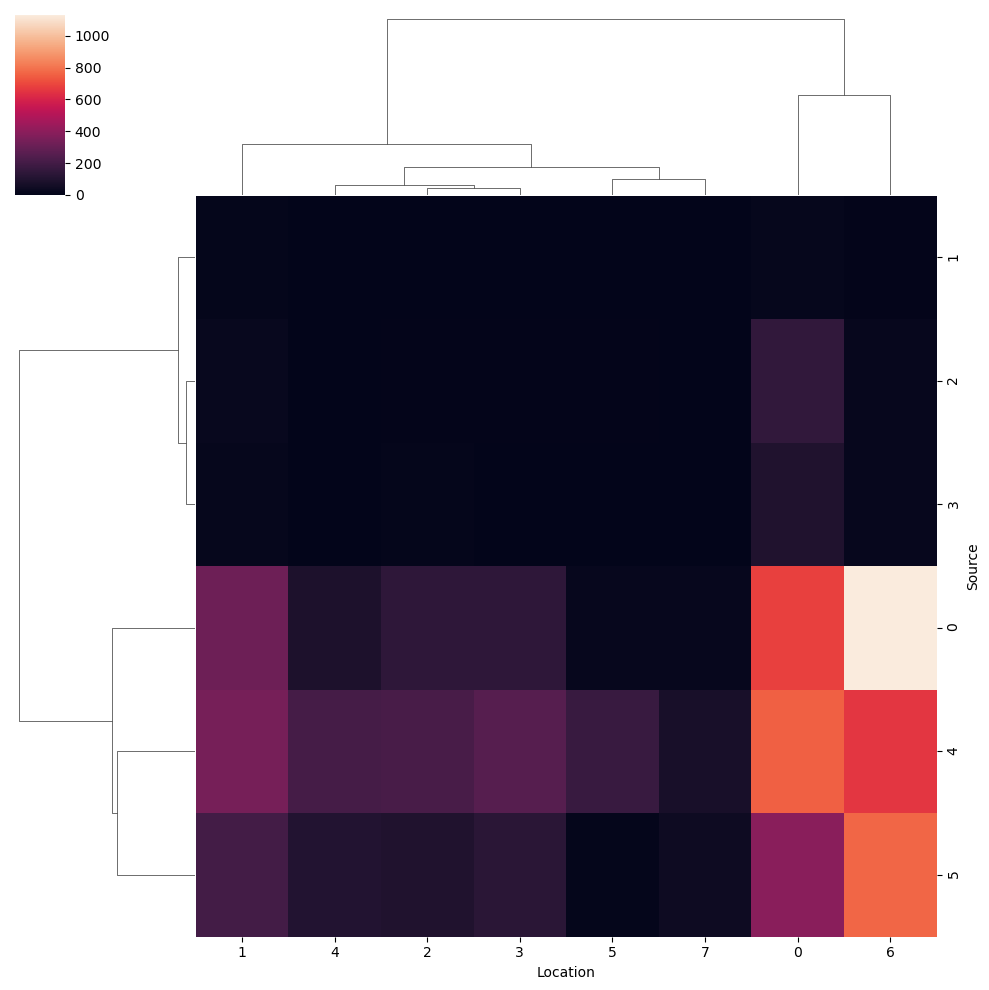

In [42]:
sns.clustermap(pd.crosstab(df["Source"],df["Location"]))

### Insights
- Upon conducting bivariate analysis between source and location, we observed a moderately negative correlation
  coefficient of -0.005.In other locations calls are  at high response.

# Multivariate

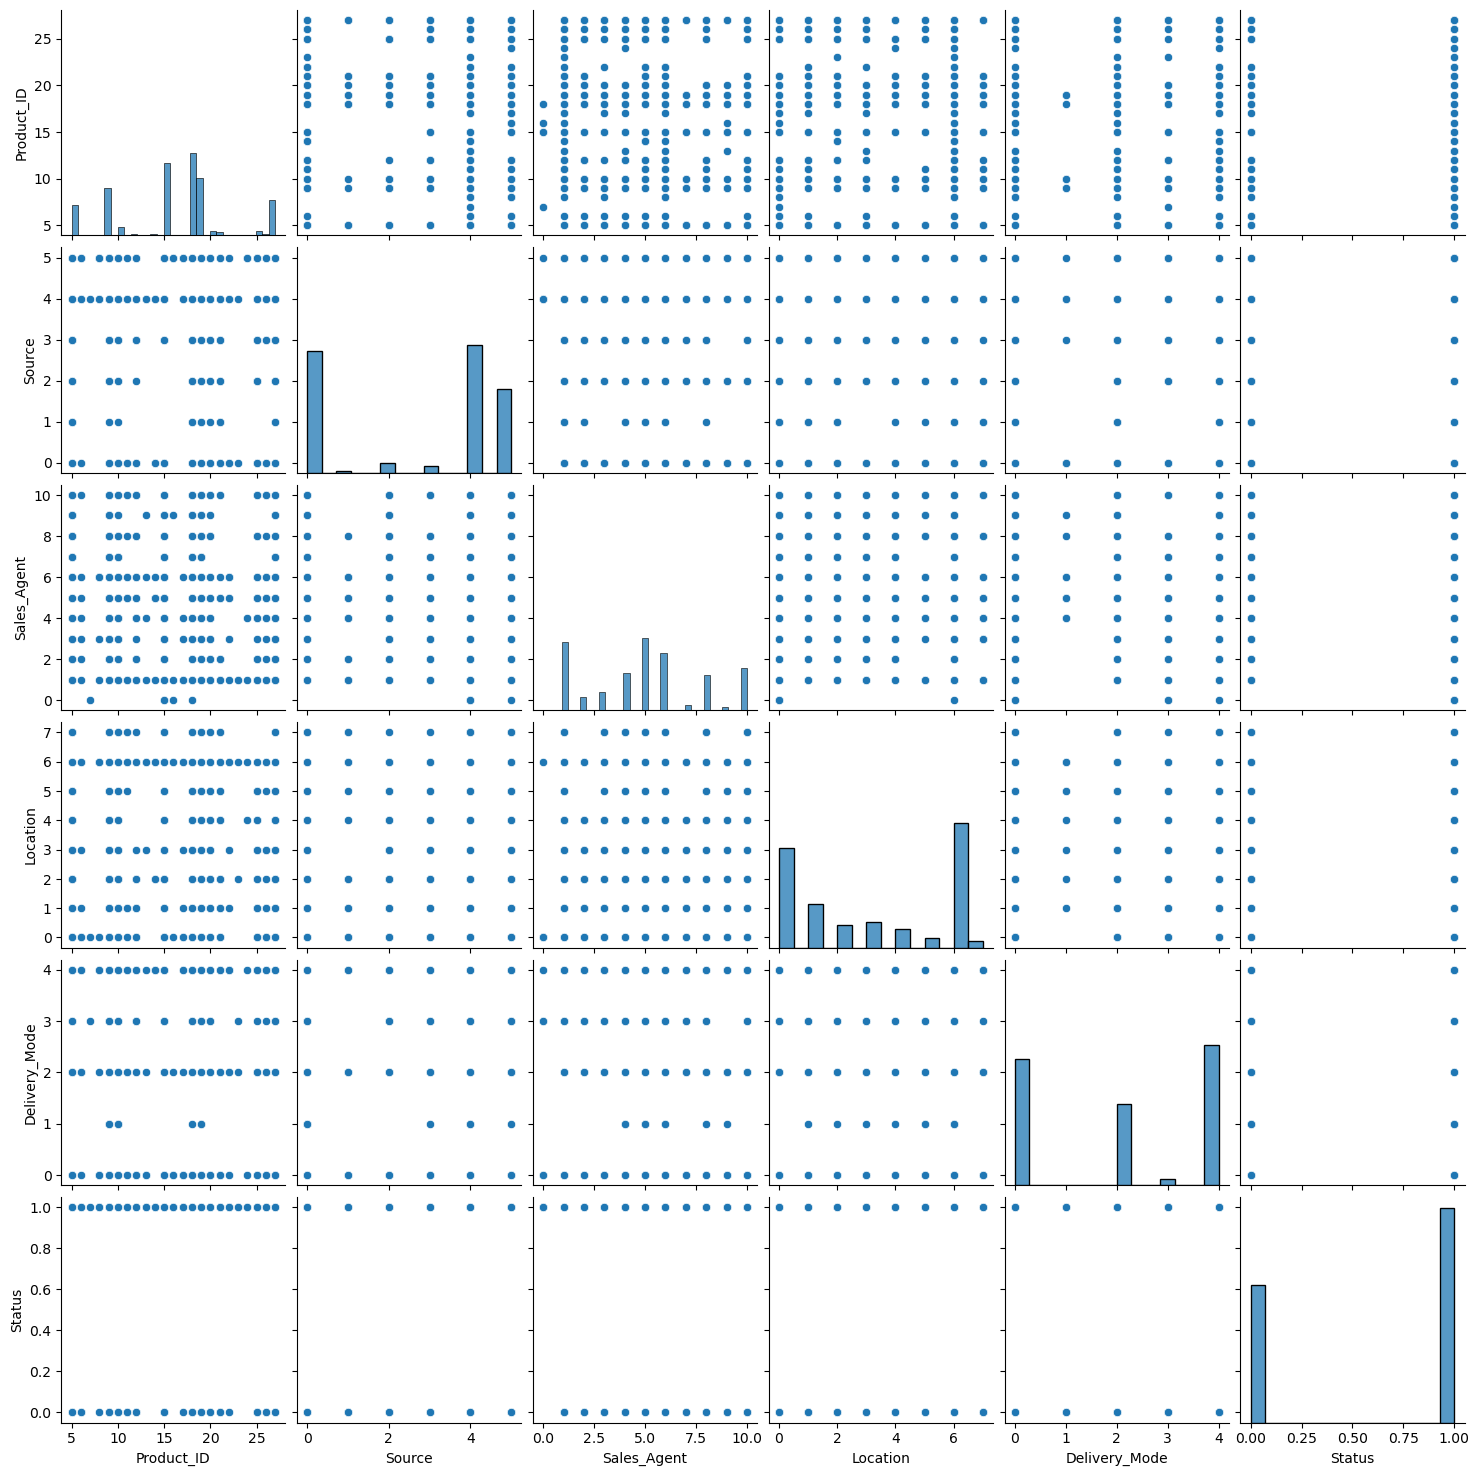

In [43]:
sns.pairplot(df)

### Insight
- This pair plot discribe the correlation of  each and every column,and get plotted in graph,we can know the distribution of data clearly 

# Target And Predictor Separation

In [44]:
X= df.drop('Status', axis=1)
y= df['Status']

In [45]:
#Standardize the feature variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Train_test_split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=42)

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

# Importing  Models 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

# Model Creation And  Evaluation

In [49]:
#Create a models
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.6713973799126638
RandomForsetClassifier
0.6975982532751092
DecisionTreeClassifier
0.675764192139738
KNeighborsClassifier
0.6801310043668122
XGBClassifier
0.6965065502183406


<Axes: >

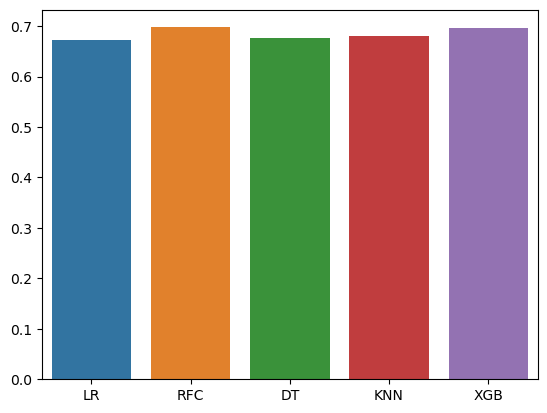

In [50]:
#Accuracy score plotting
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.58      0.60       716
           1       0.74      0.77      0.76      1116

    accuracy                           0.70      1832
   macro avg       0.68      0.68      0.68      1832
weighted avg       0.69      0.70      0.69      1832



# Hyperparameter Tuning Of Xgbclassifier

In [52]:
#Defining hyperparameters and their possible values
params= {'objective':['binary:logistic'],   #Regularization parameters
              'max_depth': [3,4,5,6],       #Type of regulations
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)  #model creation

#Use Randomizedsearchcv to find the best hyperparameters
grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.700 total time=   0.3s
[CV 2/3] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.727 total time=   0.2s
[CV 3/3] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.705 total time=   0.2s
[CV 1/3] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.703 total time=   0.4s
[CV 2/3] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.734 total time=   0.4s
[CV 3/3] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.726 total time=   0.4s
[CV 1/3] END colsample_bytre

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 5, 10, 12],
                                        'objective': ['binary:logistic'],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=3)

In [53]:
grid.best_score_

0.7208879184861717

In [54]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
#Make  predictions on the set
y_pred= grid.best_estimator_.predict(X_test)
#Evaluate the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7139737991266376
[[413 303]
 [221 895]]
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       716
           1       0.75      0.80      0.77      1116

    accuracy                           0.71      1832
   macro avg       0.70      0.69      0.69      1832
weighted avg       0.71      0.71      0.71      1832



# Hyperparameter Tuning Of Randomforestclassifier

In [56]:
from sklearn.model_selection import GridSearchCV
#Model creation
classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
#Defining hyperparameters and their possible values
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}] #Type of regulations

#Use GridSearchCV to find the best hyperparameters
model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [57]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2}

In [58]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [59]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.7101528384279476
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       716
           1       0.74      0.80      0.77      1116

    accuracy                           0.71      1832
   macro avg       0.70      0.69      0.69      1832
weighted avg       0.71      0.71      0.71      1832



# Hyperparameter Tunung For Decisiontree

In [60]:
#Defining hyperparameters and their possible values
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},
            {'min_samples_split':[2,3,4,5],'criterion':['entropy']}]  #Type of regulations

decision_tree=DecisionTreeClassifier()  #model creation

#Use Randomizedsearchcv to find the best hyperparameters
model_griddtree=GridSearchCV(estimator=decision_tree, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [61]:
model_griddtree.best_params_

{'criterion': 'gini', 'min_samples_split': 5}

In [62]:
# Predicting the model
y_predict_dt = model_griddtree.predict(X_test)

In [63]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dt))
print(classification_report(y_test,y_predict_dt))

0.6763100436681223
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       716
           1       0.75      0.71      0.73      1116

    accuracy                           0.68      1832
   macro avg       0.66      0.67      0.67      1832
weighted avg       0.68      0.68      0.68      1832



# Hyperparameter Tuning For  KNeighborsClassifier

In [64]:
#Defining hyperparameters and their possible values
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}   #Type of regulations


knn = KNeighborsClassifier()   #model creation

#Use Randomizedsearchcv to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [65]:
grid_search.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

In [66]:
# Predicting the model
y_predict_knn = grid_search.predict(X_test)

In [67]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.6959606986899564
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       716
           1       0.73      0.79      0.76      1116

    accuracy                           0.70      1832
   macro avg       0.68      0.67      0.67      1832
weighted avg       0.69      0.70      0.69      1832



# Hyperparameter Tuning For LogisticRegression

In [68]:
#Defining hyperparameters and their possible values
params= {'objective':['binary:logistic'],   #Regularization parameters
              'max_depth': [3,4,5,6],       #Type of regulations
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)  #model creation

#Use Randomizedsearchcv to find the best hyperparameters
grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=0.6;, score=0.706 total time=   0.6s
[CV 2/3] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=0.6;, score=0.729 total time=   0.6s
[CV 3/3] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=0.6;, score=0.711 total time=   0.6s
[CV 1/3] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, objective=binary:logistic, subsample=1.0;, score=0.699 total time=   0.3s
[CV 2/3] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, objective=binary:logistic, subsample=1.0;, score=0.733 total time=   0.2s
[CV 3/3] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, objective=binary:logistic, subsample=1.0;, score=0.710 total time=   0.2s
[CV 1/3] END colsample_bytree=1

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 5, 10, 12],
                                        'objective': ['binary:logistic'],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=3)

In [69]:
#Defining hyperparameters and their possible values
param_grid = {
    'C': np.logspace(-3, 3, 7),  #Regularization parameters
    'penalty': ['l1', 'l2'],   #Type of regulations 

}

logistic_reg = LogisticRegression()   #model creation

#Use Randomizedsearchcv to find the best hyperparameters
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [70]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [71]:
# Predicting the model
y_predict_log = grid_search.predict(X_test)

In [72]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.6713973799126638
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       716
           1       0.71      0.79      0.74      1116

    accuracy                           0.67      1832
   macro avg       0.65      0.64      0.64      1832
weighted avg       0.66      0.67      0.66      1832



XGBoost Classifier accuracy : 0.7139
Random Forest Classifier accuracy : 0.7101
So with the slight difference we conclude that,

XGBoost Classifier  gave an accuracy of 71%.

The project is completed with the purpose of finding out the lead quality. The company's motive is to invest in the right
prospects. We divided the Lead as 'High Potential=0 , Low Potential=1' . The result in increasing of accuracy drastically 
change when XGBoost Classifier is used.